# Applications of accelerators

WS2020/2021

### Exercise 06

### Exercise 06 solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- [2 points] design a **series** resonant circuit R=12 Ω, C=200 [pF], L= 50 [nH]. Calculate the following quantities using correct units:

 - angular resonant frequency
 - resonant frequency
 - Q value
 - R/Q
 - damping constant (gamma)
 - damping constant in units of [dB]
 - damping factor (what is the unit of damping factor?)

In [2]:
L = 50e-9 # [H]
C = 200e-12 # [F]
R = 12 # [Ω]

In [3]:
w_0 = np.sqrt(1/L/C)
print(w_0, '[rad/s]')

316227766.01683795 [rad/s]


In [4]:
f_0 = w_0 / 2/np.pi
print(f_0, '[Hz]')

50329212.10448704 [Hz]


In [5]:
Qs = 1/(w_0*R*C)
print(Qs)

1.3176156917368247


In [6]:
print(R/Qs, 'ohms')

9.107359661284933 ohms


In [7]:
gamma = R/L/2
print(gamma, '[Np/s]')
print(20*np.log10(np.e)*gamma, '[dB/s]')
print('Np and dB are pseudo-units. In SI units, gamma has the same units as frequency i.e. 1/s' )

120000000.0 [Np/s]
1042306756.5678045 [dB/s]
Np and dB are pseudo-units. In SI units, gamma has the same units as frequency i.e. 1/s


In [8]:
zeta = gamma / w_0
print(zeta, '[dimensionless]')
print('Dimensionless, because Np and dB are not SI units.')

0.3794733192202055 [dimensionless]
Dimensionless, because Np and dB are not SI units.


In [9]:
# alternative calculation of gamma and zeta
gamma = w_0/2/Qs
print(gamma, '[Np/s]')
zeta = 1/2/Qs
print(zeta, '[dimensionless]')
print('Dimensionless, because Np and dB are not SI units.')

120000000.00000001 [Np/s]
0.37947331922020555 [dimensionless]
Dimensionless, because Np and dB are not SI units.


- [1 point] A **sine** wave voltage has an RMS value of 100 [V], what is its peak value? what is the average power dissipated on a 50 [Ω] resistor?


In [10]:
u_rms = 100 # [V]
u_peak = np.sqrt(2)*u_rms
print(u_peak, '[V]')

141.4213562373095 [V]


In [11]:
R = 50 # [Ohm]
p_avg = u_peak**2/2/R
print(p_avg, '[W]')

200.0 [W]


- [1 point] Write an expression for the complex valued impedance of a circuit consisting of an inductor L and a resistor R connected in **parallel**, separated in cartesian form?

$$\frac{1}{Z}=\frac{1}{R}+\frac{1}{j\omega L}$$
$$Z=\frac{L^2R\omega^2}{L^2\omega^2+R^2}+j\frac{LR^2\omega}{L^2\omega^2+R^2}$$

- [1 point] Now connect the above circuit in **series** to a capacitor C and write down the overall expression for the impedance in cartesian form.

$$Z=\frac{L^2R\omega^2}{L^2\omega^2+R^2}+j\frac{LR^2\omega}{L^2\omega^2+R^2}+\frac{1}{j\omega C}$$
$$Z=\frac{L^2R\omega^2}{L^2\omega^2+R^2}+j\left(\frac{LR^2\omega}{L^2\omega^2+R^2}-\frac{1}{\omega C}\right)$$

- [1 point] Write down in your own words, what the Nyquist theorem in sampling is. A child is playing: moving up and down on a seesaw 2 times per second while moving their hands 3 times per seconds. How many frames per second should a camera at least have so that the child and all its motions is depicted correctly in a motion capture video?

According to the nyquist theorem, the sampling frequency should be at least twice as fast as the fastest frequency component of the signal, otherwise the data will not correspond to the original data. so in the example the sampling frequency (taking pictures) should be at least 6 times per second.

- [1 point] An analog to digital converter has 12 bits, while its reference voltage is 5[V]. Values are written on a computer. What is the voltage corresponding to the binary value **0000 0000 1000** ? 

12 bit means from 0 to 2^(12)-1 which is distributed from 0 to 4095. Every voltage step is 5[V] / 4096 = 0.0012 [V]
so

- 0000 0000 0000 in binary corresponds to decimal 0 = 0 volt
- 0000 0000 0001 in binary corresponds to decimal 1 = 0.0012 volt
- 0000 0000 0010 in binary corresponds to decimal 2 = 0.0012 x 2 = 0.0024 volts
- 0000 0000 0011 in binary corresponds to decimal 3 = 0.0012 x 3 = 0.0036 volts
- 0000 0000 0100 in binary corresponds to decimal 4
- 0000 0000 0101 in binary corresponds to decimal 5
- 0000 0000 0110 in binary corresponds to decimal 6
- 0000 0000 0111 in binary corresponds to decimal 7
- **0000 0000 1000** in binary corresponds to decimal 8 = 0.0012 x 8 = 0.0096 volts

* [1 point] A system has a voltage gain (i.e. amplification or multiplication) of 2 (That means the system doubles the input signal voltage, or the output voltage is twice as large as the input). Describe this voltage gain in pseudo units of [dB].

In [12]:
print(20*np.log10(2), '[dB]')

6.020599913279624 [dB]


* [1 point] A source provides a signal with a power of 200 [mW]. How much is it in pseudo units of [dBm]?

In [13]:
print(10*np.log10(200/1), '[dBm]')

23.010299956639813 [dBm]


* [1 point] What should be done to a signal from an accelerator in order be able to store it on a computer?

The continuous time signals will be digitised in amplitide and sampled in time. Such values then can be stored on a computer for further processing.

* [1 point] A discrete time signal (i.e. a signal that is already stored on a computer) is x[n] = [1,2,3] which goes through a system whose discrete time impulse response is known as h[n] = [4,5,6,7]. Calculate the output y[n] by hand. Additionally use python to calculate and plot the result like in the example.

output signal: y =  [ 4 13 28 34 32 21]


<StemContainer object of 3 artists>

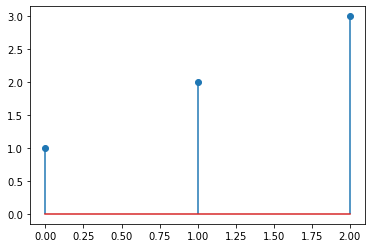

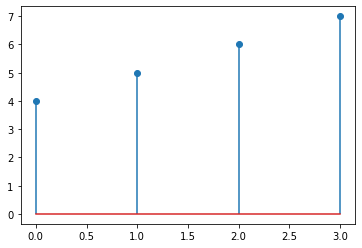

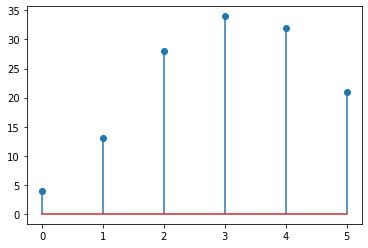

In [14]:
x = np.array([1,2,3])
h = np.array([4,5,6,7])
y = np.convolve(x, h)
print('output signal: y = ', y)
plt.stem(x)
plt.figure()
plt.stem(h)
plt.figure()
plt.stem(y)

* [3 point BONUS, i.e. **you get the points if you solve everything correctly** not points for parts] A voltage divider consists of identical resistors. What is the voltage gain in [dB] and in [Np]? What is its impulse response?

voltage divider with identical resistors halves the voltage.

In [15]:
print('gain is:')
print(20*np.log10(0.5), '[dB]')
print(20*np.log10(0.5)/20/np.log10(np.e), '[Np]')

gain is:
-6.020599913279624 [dB]
-0.6931471805599453 [Np]


The impulse response is just:
$$h[n] = 0.5\delta[n]$$
where $\delta[n]$ is the Kronecker delta. Kronecker delta is a function that has the value of one at zero and zero everywhere else